# Import libraries

In [14]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os

% matplotlib inline

eV = 1.6e-19

## plot electron dispersion in reduced regime

In [2]:
directory = "/Users/amirhossein/research/exciton_energy"
filename = os.path.join(directory,"cnt1.el_energy_redu.dat")
with open(filename, mode='r') as f:            
    line = f.readline()
    line = f.readline() # second line contains the shape of the cube
    dims = list(map(int, line.split()))
    
    data = np.loadtxt(f)
    
    print("dimensions are n_c: {}, n_k: {}, n_mu: {}".format(dims[0], dims[1], dims[2]))
    
    assert dims[0]*dims[2] is data.shape[0]
    el_energy_reduced = np.empty(dims)
    for k in range(dims[2]):
        el_energy_reduced [:,:,k] = data[k*dims[0]:(k+1)*dims[0], :]
    
    fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
    for i in range(dims[0]):
        for k in range(dims[2]):
            plt.plot(el_energy_reduced[i,:,k], linewidth=3)

    plt.title('electron energy bands versus k-vector', size=24)
    plt.xlabel('k-vector', size=20)
    plt.ylabel('energy [eV]', size=20)
        

FileNotFoundError: [Errno 2] No such file or directory: '/Users/amirhossein/research/exciton_energy/cnt1.el_energy_redu.dat'

# Plot real and imaginary parts of $v_q$

dimensions are [2801, 2, 4]
dimensions are [2801, 2, 4]


Text(0,0.5,'energy [eV]')

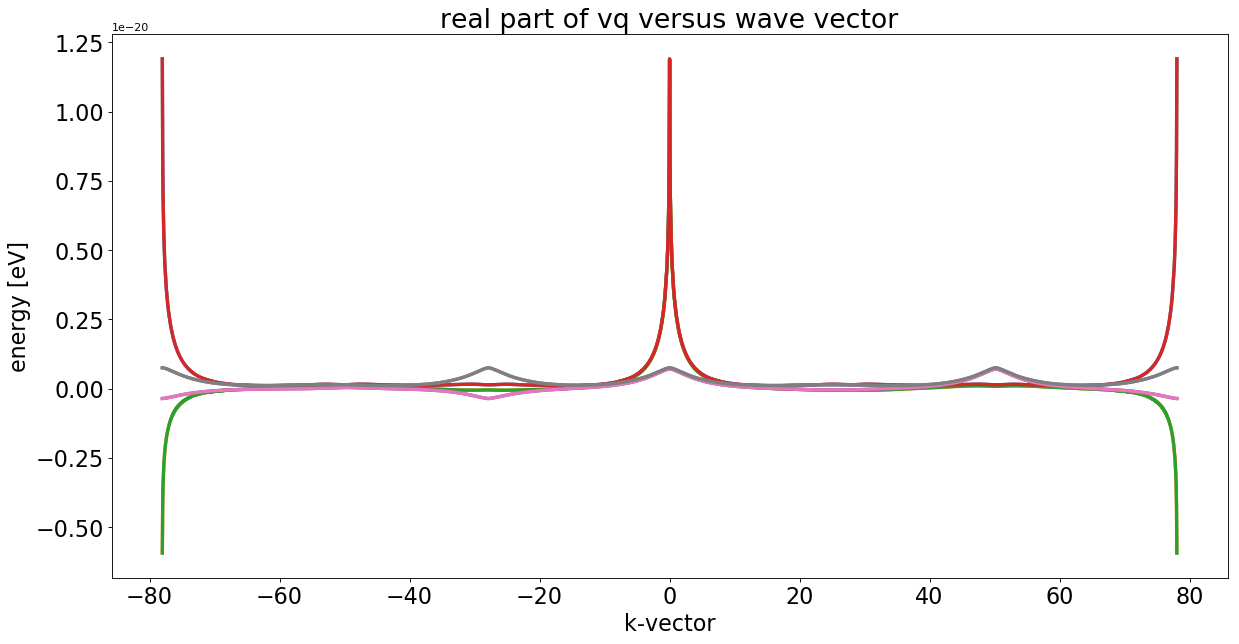

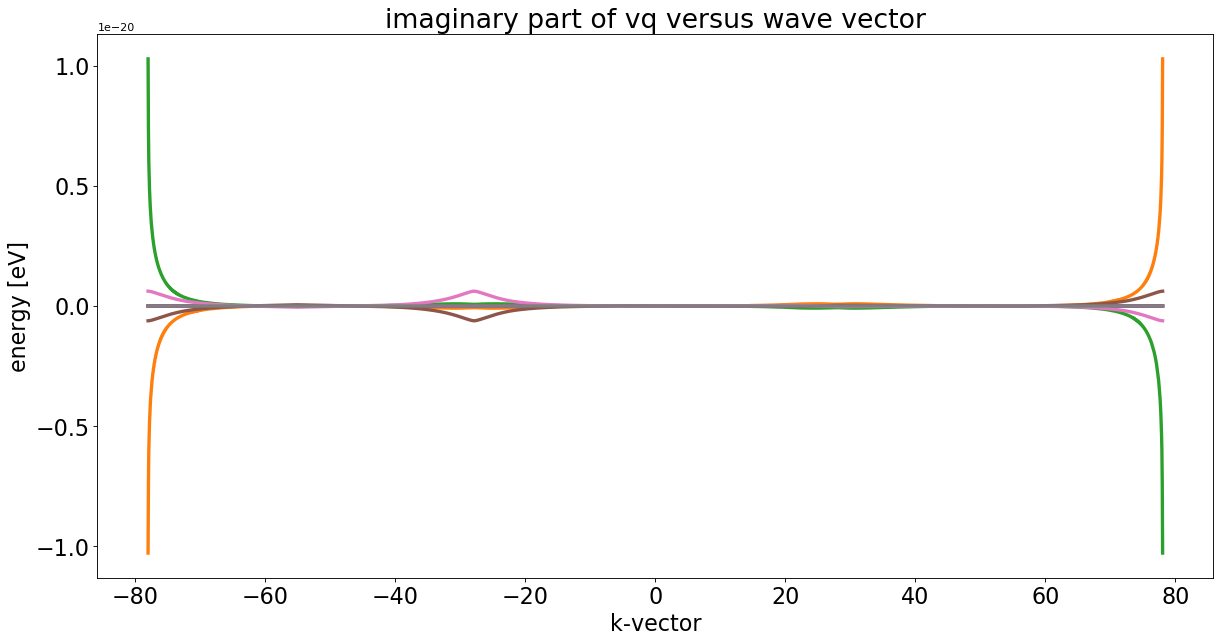

In [13]:
directory = "/Users/amirhossein/research/exciton_energy"

# load q_vector
filename = os.path.join(directory,"cnt1.q_vec.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
q_vec = np.empty(dims)
q_vec = data/1e9
# print("q_vec dimensions")

# load and plot real part of vq
filename = os.path.join(directory,"cnt1.real_vq.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)

print("dimensions are {}".format(dims))

assert dims[0]*dims[2] == data.shape[0], "Mismatch in data dimensions: {}".format(data.shape)
vq_real = np.empty(dims)
for k in range(dims[2]):
    vq_real[:,:,k] = data[k*dims[0]:(k+1)*dims[0], :]
    
vq_real = vq_real/eV


fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for j in range(dims[1]):
    for k in range(dims[2]):
        plt.plot(q_vec,vq_real[:,j,k], linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('real part of vq versus wave vector', size=24)
plt.xlabel('k-vector', size=20)
plt.ylabel('energy [eV]', size=20)

# load and plot imaginary part of vq
filename = os.path.join(directory,"cnt1.imag_vq.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)

print("dimensions are {}".format(dims))

assert dims[0]*dims[2] == data.shape[0], "Mismatch in data dimensions: {}".format(data.shape)
vq_imag = np.empty(dims)
for k in range(dims[2]):
    vq_imag[:,:,k] = data[k*dims[0]:(k+1)*dims[0], :]


fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for j in range(dims[1]):
    for k in range(dims[2]):
        plt.plot(q_vec, vq_imag[:,j,k], linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('imaginary part of vq versus wave vector', size=24)
plt.xlabel('k-vector', size=20)
plt.ylabel('energy [eV]', size=20)
        